In [1]:
import xarray as xr
import folium
import glob
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import cm, colors
from sklearn.cluster import KMeans
np.random.seed(42)

In [2]:
ds_rain = xr.open_dataset('data/TOT_PRECIP.2D.201807.DaySum.grb', engine='cfgrib')
ds_rain = ds_rain.isel(dict(x=slice(400,450), y=slice(450,500))).isel(time=30)
df_rain = ds_rain.tp.to_dataframe()

In [3]:
ds_sun = xr.open_dataset('data/DURSUN.2D.201807.DaySum.grb', engine='cfgrib')
ds_sun = ds_sun.isel(dict(x=slice(400,450), y=slice(450,500))).isel(time=30)
df_sun = ds_sun.to_dataframe()

In [4]:
ds_tmp = xr.open_dataset('data/TMAX_2M.2D.201807.DayMax.grb', engine='cfgrib')
ds_tmp = ds_tmp.isel(dict(x=slice(400,450), y=slice(450,500))).isel(time=30)
df_tmp = ds_tmp.to_dataframe()

In [5]:
print("Rain shape:", df_rain.shape)
print("Sun shape:", df_sun.shape)

Rain shape: (2500, 7)
Sun shape: (2500, 7)


In [6]:
df = pd.concat([df_rain, df_sun, df_tmp], axis=1)

In [7]:
df

time   step  surface   latitude  longitude  \
y  x                                                              
0  0  2018-07-31 01:00:00 1 days        0  51.648840   7.648655   
   1  2018-07-31 01:00:00 1 days        0  51.656460   7.736423   
   2  2018-07-31 01:00:00 1 days        0  51.664020   7.824221   
   3  2018-07-31 01:00:00 1 days        0  51.671512   7.912048   
   4  2018-07-31 01:00:00 1 days        0  51.678940   7.999903   
...                   ...    ...      ...        ...        ...   
49 45 2018-07-31 01:00:00 1 days        0  54.612072  11.223554   
   46 2018-07-31 01:00:00 1 days        0  54.617060  11.317904   
   47 2018-07-31 01:00:00 1 days        0  54.621984  11.412277   
   48 2018-07-31 01:00:00 1 days        0  54.626836  11.506672   
   49 2018-07-31 01:00:00 1 days        0  54.631616  11.601088   

               valid_time   tp                time   step  surface  ...  \
y  x                                                                ...   
0  0  2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   1  2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   2  2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   3  2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   4  2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
...                   ...  ...                 ...    ...      ...  ...   
49 45 2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   46 2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   47 2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   48 2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   
   49 2018-08-01 01:00:00  0.0 2018-07-31 01:00:00 1 days        0  ...   

       longitude          valid_time paramId_0                time   step  \
y  x                                                                        
0  0    7.648655 2018-08-01 01:00:00   40550.0 2018-07-31 01:00:00 1 days   
   1    7.636302 2018-08-01 01:00:00   40600.0 2018-07-31 01:00:00 1 days   
   2    7.623920 2018-08-01 01:00:00   43300.0 2018-07-31 01:00:00 1 days   
   3    7.611508 2018-08-01 01:00:00   43300.0 2018-07-31 01:00:00 1 days   
   4    7.599066 2018-08-01 01:00:00   41500.0 2018-07-31 01:00:00 1 days   
...          ...                 ...       ...                 ...    ...   
49 45  11.633797 2018-08-01 01:00:00   40600.0 2018-07-31 01:00:00 1 days   
   46  11.625652 2018-08-01 01:00:00   43300.0 2018-07-31 01:00:00 1 days   
   47  11.617486 2018-08-01 01:00:00   44200.0 2018-07-31 01:00:00 1 days   
   48  11.609298 2018-08-01 01:00:00   45100.0 2018-07-31 01:00:00 1 days   
   49  11.601088 2018-08-01 01:00:00   43300.0 2018-07-31 01:00:00 1 days   

      heightAboveGround   latitude  longitude          valid_time       mx2t6  
y  x                                                                           
0  0                  2  51.648840   7.648655 2018-08-01 01:00:00  305.193359  
   1                  2  51.703304   7.636302 2018-08-01 01:00:00  305.299805  
   2                  2  51.757768   7.623920 2018-08-01 01:00:00  305.208008  
   3                  2  51.812228   7.611508 2018-08-01 01:00:00  304.992188  
   4                  2  51.866688   7.599066 2018-08-01 01:00:00  304.865234  
...                 ...        ...        ...                 ...         ...  
49 45                 2  54.412436  11.633797 2018-08-01 01:00:00  299.428711  
   46                 2  54.467232  11.625652 2018-08-01 01:00:00  299.399414  
   47                 2  54.522028  11.617486 2018-08-01 01:00:00  299.145508  
   48                 2  54.576824  11.609298 2018-08-01 01:00:00  298.909180  
   49                 2  54.631616  11.601088 2018-08-01 01:00:00  299.663086  

[2500 rows x 21 columns]

In [8]:
df = df.reset_index()[['latitude','longitude','tp', 'paramId_0', 'mx2t6']]
df = df.rename(columns={"paramId_0": "sunshine_seconds", "tp":"total_precipitation", "mx2t6": "temperature"})

In [9]:
df = df.loc[:,~df.columns.duplicated()] # removes duplicate columns
df

latitude  longitude  total_precipitation  sunshine_seconds  temperature
0     51.648840   7.648655                  0.0           40550.0   305.193359
1     51.656460   7.736423                  0.0           40600.0   305.299805
2     51.664020   7.824221                  0.0           43300.0   305.208008
3     51.671512   7.912048                  0.0           43300.0   304.992188
4     51.678940   7.999903                  0.0           41500.0   304.865234
...         ...        ...                  ...               ...          ...
2495  54.612072  11.223554                  0.0           40600.0   299.428711
2496  54.617060  11.317904                  0.0           43300.0   299.399414
2497  54.621984  11.412277                  0.0           44200.0   299.145508
2498  54.626836  11.506672                  0.0           45100.0   298.909180
2499  54.631616  11.601088                  0.0           43300.0   299.663086

[2500 rows x 5 columns]

### Lets make the precipitation, temperature and sunshine duration categorical.

First we need to examine how we set up the categories. Therefore lets have a look at the ranges:

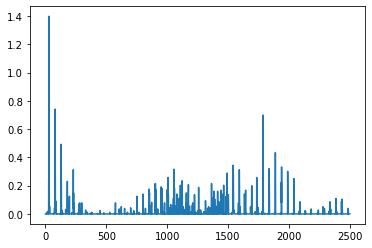

In [10]:
plt.plot(df_rain["tp"].values)

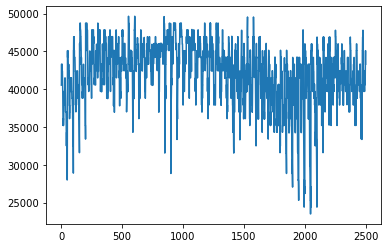

In [11]:
plt.plot(df_sun["paramId_0"].values)

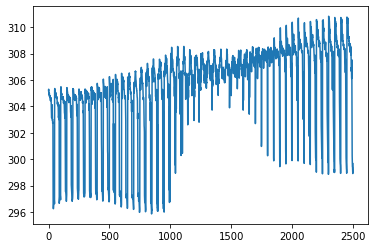

In [12]:
plt.plot(df_tmp["mx2t6"].values)

In [13]:
rain_bins = [-np.inf, 0.001, 0.2, np.inf]
rain_labels = ['no rain','low','high']

sun_bins =  [0, 35000, 45000, np.inf]
sun_labels = ['low', 'medium', 'high']

tmp_bins =  [0, 300, 306, np.inf]
tmp_labels = ['low', 'medium', 'high']

df['total_precipitation'] = pd.cut(df.total_precipitation, bins=rain_bins, labels=rain_labels)
df['sunshine_seconds'] = pd.cut(df.sunshine_seconds, bins=sun_bins, labels=sun_labels)
df['temperature'] = pd.cut(df.temperature, bins=tmp_bins, labels=tmp_labels)


In [14]:
df["total_precipitation"] = df["total_precipitation"].astype('category')
df["sunshine_seconds"] = df["sunshine_seconds"].astype('category')
df["temperature"] = df["temperature"].astype('category')

In [15]:
df_encoded = df[['total_precipitation', 'sunshine_seconds', 'temperature']]

In [16]:
df_encoded['total_precipitation'] = df_encoded['total_precipitation'].cat.codes
df_encoded['sunshine_seconds'] = df_encoded['sunshine_seconds'].cat.codes
df_encoded['temperature'] = df_encoded['temperature'].cat.codes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [17]:
df_encoded

total_precipitation  sunshine_seconds  temperature
0                       0                 1            1
1                       0                 1            1
2                       0                 1            1
3                       0                 1            1
4                       0                 1            1
...                   ...               ...          ...
2495                    0                 1            0
2496                    0                 1            0
2497                    0                 1            0
2498                    0                 2            0
2499                    0                 1            0

[2500 rows x 3 columns]

In [18]:
X = StandardScaler().fit_transform(df_encoded[['total_precipitation', 'sunshine_seconds', 'temperature']])

In [19]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.predict(X)

In [20]:
labels

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [21]:
df["label"] = labels


In [22]:
my_loc = {'lat':53.7287773, 'lon': 10.2656004}

In [23]:
x = np.arange(k)
colors_array = cm.inferno(np.linspace(0, 1, len(x)))
col = [colors.rgb2hex(i) for i in colors_array]

# create map of Hamburg using latitude and longitude values
map_weather_category = folium.Map(location=[53, 9], zoom_start=8)

# add data to map
for lat, lon, label, index in zip(df['latitude'], df['longitude'], df['label'], df.index):
    p_label = folium.Popup(f'Cluster: {label}\n Rain: {df["total_precipitation"][index]}\n Sunshine: {df["sunshine_seconds"][index]}\n Temperature: {df["temperature"][index]}\n', parse_html=True)
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=p_label,
            color=col[label-1],
            fill=True,
            fill_color=col[label-1],
            fill_opacity=0.7).add_to(map_weather_category)

# add own position to map
folium.Marker([my_loc['lat'], my_loc['lon']], popup="You are here!").add_to(map_weather_category)
map_weather_category

## Lets find the next position where it is not raining and look for restaurants there:

In [24]:
import geopy.distance
from tqdm import tqdm
import os
import requests
import json, requests

We get every point from our dataframe and calculate the distance to our position:

In [25]:
my_coords = (my_loc['lat'], my_loc['lon'])
distances = np.empty(len(df.index))
for i in tqdm(range(len(df.index))):
    coords_2 = (df['latitude'][i], df['longitude'][i])
    distances[i] = geopy.distance.geodesic(my_coords, coords_2).km

100%|██████████| 2500/2500 [00:00<00:00, 3904.86it/s]


In [26]:
df["distance"] = distances # adds the calculated distances to the dataframe

lets save the information of the point which has nice weahter and is closest to our location into a new variable:

In [27]:
place_to_be = df.iloc[df["distance"][df['label'] == 2].idxmin()]

In [28]:
place_to_be

latitude               53.6659
longitude              10.1597
total_precipitation    no rain
sunshine_seconds          high
temperature               high
label                        2
distance               9.89572
Name: 1682, dtype: object

We can see that the next point with better weather conditions is 12km away. Now lets see via Foursquare, if there are any restaurants near that point

In [29]:
# get secret values from environment variables:
CLIENT_ID = os.environ.get('FS_ID')
CLIENT_SECRET = os.environ.get('FS_SECRET')
VERSION = '20191204'
LIMIT = 100

In [33]:
CLIENT_ID = 'AA2P0COF1GLXMQK3NWZH5FGUYFSCHKN4K3UDADXVP1MOPMEP'
CLIENT_SECRET = 'KD2VRZA122RVXEBPXXHMY0GNHN1NQRLM2QVWSCPDNOSATQCS'

In [34]:
lat = place_to_be.latitude
lon = place_to_be.longitude
radius = 100


In [35]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
  client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET,
  v='20191223',
  ll=f"{lat},{lon}",
  query='coffee',
  limit=100
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
result_list = data["response"]["groups"][0]["items"]
print(f"Found {len(result_list)} results!")

Found 29 results!


In [36]:
results = []
for result in result_list:
    r = result['venue']['location']
    results.append([r['lat'], r['lng'], result['venue']['name']])

In [37]:
df_results = pd.DataFrame(results)
df_results.rename(columns={0: 'lat', 1: 'lon', 2: 'name'}, inplace=True)
df_results

lat        lon                              name
0   53.648416  10.168018              Das Leben isst schön
1   53.708106  10.108156  caros konditorei und davids café
2   53.641298  10.080805                    Café Reinhardt
3   53.665235  10.089865                    Café Reinhardt
4   53.640210  10.083606                        Eiscuisine
5   53.663482  10.220533               Hansebäckerei Junge
6   53.694990  10.137429                   Eisbär Ohlstedt
7   53.654331  10.091650                Nespresso Boutique
8   53.654102  10.091385                         Starbucks
9   53.673000  10.239136                       Caligo Café
10  53.671777  10.238991                Eiscafe "Il Gatto"
11  53.677639  10.149581                         Dein Café
12  53.649740  10.163324                  Atelier Gourmand
13  53.648998  10.163984                     Caligo Coffee
14  53.648974  10.163967                            Hamers
15  53.648702  10.164561                            Tchibo
16  53.648658  10.164458                    Eiscafe Italia
17  53.648512  10.166087                 Wiener Kaffeehaus
18  53.648354  10.168013                       Wiener Cafe
19  53.654625  10.092996                      World Coffee
20  53.654194  10.090594                        Grand Cafe
21  53.654264  10.111748           Konditorei Jörg Fastert
22  53.654669  10.093129                     Balzac Coffee
23  53.654466  10.091650                            Tchibo
24  53.654013  10.091438                   JOE & THE JUICE
25  53.653874  10.090543                    TeeGschwendner
26  53.673002  10.239271                 Hansebäcker Junge
27  53.642931  10.071396                Cafe Im Herrenhaus
28  53.718021  10.111619                        GutsKaffee

In [38]:
final_location = df_results.iloc[0]

In [39]:
# create map of Hamburg using latitude and longitude values
map_weather_category = folium.Map(location=[53, 9], zoom_start=8)


# add data to map
for lat, lon, label, index in zip(df['latitude'], df['longitude'], df['label'], df.index):
    p_label = folium.Popup(f'Cluster: {label}\n Rain: {df["total_precipitation"][index]}\n Sunshine: {df["sunshine_seconds"][index]}\n Temperature: {df["temperature"][index]}\n', parse_html=True)
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=p_label,
            color=col[label-1],
            fill=True,
            fill_color=col[label-1],
            fill_opacity=0.7).add_to(map_weather_category)

# add own position to map
folium.Marker([my_loc['lat'], my_loc['lon']], popup="You are here!").add_to(map_weather_category)
folium.Marker([final_location['lat'], final_location['lon']], popup=final_location['name']).add_to(map_weather_category)

map_weather_category